In [5]:
import pandas as pd
import numpy as np

In [18]:
data = [[1,2,3],[4,5,6],[7,8,9]]
col = ['col1','col2','col3']
row = ['row1','row2','row3']
df = pd.DataFrame(data=data,index=row,columns=col)
print(df)

      col1  col2  col3
row1     1     2     3
row2     4     5     6
row3     7     8     9


In [19]:
df.insert(2, 'col4', [10,11,12])

In [20]:
df

,col1,col2,col4,col3
row1,1,2,10,3
row2,4,5,11,6
row3,7,8,12,9


In [21]:
df.iloc[:, 3]

row1    3
row2    6
row3    9
Name: col3, dtype: int64

In [22]:
df.insert(3,'col3',[10,11,12],allow_duplicates=True)
print(df)

      col1  col2  col4  col3  col3
row1     1     2    10    10     3
row2     4     5    11    11     6
row3     7     8    12    12     9


In [23]:
data = [[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]
col = ['col1','col2','col3','col4']
row = ['row1','row2','row3','row4']
df = pd.DataFrame(data=data,index=row,columns=col)
print(df)

      col1  col2  col3  col4
row1     1     2     3     4
row2     5     6     7     8
row3     9    10    11    12
row4    13    14    15    16


In [24]:
df.pop('col3')
df

,col1,col2,col4
row1,1,2,4
row2,5,6,8
row3,9,10,12
row4,13,14,16


In [25]:
df

,col1,col2,col4
row1,1,2,4
row2,5,6,8
row3,9,10,12
row4,13,14,16


In [30]:
row = ['row1','row2','row3']
col = ['col1','col2','col3']
data = [[1,2,3],[4,5,6],[7,8,9]]
df = pd.DataFrame(data=data, index=row, columns=col)
print(df)

      col1  col2  col3
row1     1     2     3
row2     4     5     6
row3     7     8     9


In [31]:
df.drop(labels='row2', axis=0)

,col1,col2,col3
row1,1,2,3
row3,7,8,9


axis 기본값이 0으로 설정되어 있는것 같다.

In [32]:
df.drop(labels='row2')

,col1,col2,col3
row1,1,2,3
row3,7,8,9


In [33]:
df.drop(labels='col1')

KeyError: "['col1'] not found in axis"

copy

In [34]:
row = ['row1','row2','row3','row4']
col = ['col1','col2','col3','col4']
data = [[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]
df = pd.DataFrame(data=data, index=row, columns=col)
print(df)

      col1  col2  col3  col4
row1     1     2     3     4
row2     5     6     7     8
row3     9    10    11    12
row4    13    14    15    16


In [37]:
df.truncate(before='row2',after='row3',axis=0, copy=False)
df

,col1,col2,col3,col4
row1,1,2,3,4
row2,5,6,7,8
row3,9,10,11,12
row4,13,14,15,16


차원축소, 스칼라 변환 (squeeze)

In [38]:
df=pd.DataFrame(data=[[1,2],[3,4]],index=['row1','row2'],columns=['col1','col2'])
print(df)

      col1  col2
row1     1     2
row2     3     4


In [39]:
df_row=df.drop(index='row1')
print(df_row)

      col1  col2
row2     3     4


In [40]:
print(df_row.squeeze())

col1    3
col2    4
Name: row2, dtype: int64


In [41]:
df_col=df.drop(columns='col1')
print(df_col)

      col2
row1     2
row2     4


In [42]:
print(df_col.squeeze())

row1    2
row2    4
Name: col2, dtype: int64


pivot_table

In [43]:
col = ['Machine','Country','Grade','Price','Count']
data = [['TV','Korea','A',1000,3],
        ['TV','Korea','B', 800,8],
        ['TV','Korea','B', 800,2],
        ['TV','Japan','A',1300,5],
        ['TV','Japan','A',1300,1],
        ['PC','Korea','B',1500,6],
        ['PC','Korea','A',2000,9],
        ['PC','Japan','A',3000,3],
        ['PC','Japan','B',2500,3]]
df = pd.DataFrame(data=data, columns=col)
print(df)

  Machine Country Grade  Price  Count
0      TV   Korea     A   1000      3
1      TV   Korea     B    800      8
2      TV   Korea     B    800      2
3      TV   Japan     A   1300      5
4      TV   Japan     A   1300      1
5      PC   Korea     B   1500      6
6      PC   Korea     A   2000      9
7      PC   Japan     A   3000      3
8      PC   Japan     B   2500      3


In [55]:
print(df.pivot_table(values='Price',index=['Machine','Country'],columns='Grade'))

Grade                 A       B
Machine Country                
PC      Japan    3000.0  2500.0
        Korea    2000.0  1500.0
TV      Japan    1300.0     NaN
        Korea    1000.0   800.0


explode

In [94]:
data = [[[1,2],['a','b']],[3,'c']]
idx = ['row1','row2']
col = ['col1','col2']
df1 = pd.DataFrame(data =data, index = idx, columns = col)
print(df)

           col1 col2       col3
row1  [1, 2, 3]    0  [a, b, c]
row2          4   []          3
row3          5    2  [x, y, z]


In [95]:
data= [[[1,2,3],0,['a','b','c']],[4,[],3],[5,2,['x','y','z']]]
idx = ['row1','row2','row3']
col = ['col1','col2','col3']
df2 = pd.DataFrame(data = data, index = idx, columns = col)
print(df)

           col1 col2       col3
row1  [1, 2, 3]    0  [a, b, c]
row2          4   []          3
row3          5    2  [x, y, z]


In [96]:
print(df2.explode(column='col1'))

     col1 col2       col3
row1    1    0  [a, b, c]
row1    2    0  [a, b, c]
row1    3    0  [a, b, c]
row2    4   []          3
row3    5    2  [x, y, z]


In [97]:
print(df2.explode('col1'))

     col1 col2       col3
row1    1    0  [a, b, c]
row1    2    0  [a, b, c]
row1    3    0  [a, b, c]
row2    4   []          3
row3    5    2  [x, y, z]


In [104]:
print(df1.explode(column=['col1','col2']))

ValueError: column must be a scalar

In [84]:
print( pd.__version__ )

0.25.1


column의 list나 tuple을 제공하는 형태는 pandas 1.3.0버전 이상에서 가능

In [2]:
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]], index=['row1', 'row2', 'row3'], columns=['col1', 'col2', 'col3'])
print(df)

      col1  col2  col3
row1     1     2     3
row2     4     5     6
row3     7     8     9


In [5]:
result = df.index
print(result)

Index(['row1', 'row2', 'row3'], dtype='object')


In [2]:
data = [[1,2,3],[4,5,6],[7,8,9]]
col = ['col1','col2','col3']
row = ['row1','row2','row3']
df = pd.DataFrame(data=data,index=row,columns=col)
print(df)

      col1  col2  col3
row1     1     2     3
row2     4     5     6
row3     7     8     9


In [6]:
df.keys()

Index(['col1', 'col2', 'col3'], dtype='object')

In [5]:
df1.keys

<bound method Series.keys of idx1    1
idx2    2
dtype: int64>

In [4]:
df=pd.DataFrame({
    'A':[10,20,10,30,10],
    'B':[None, True, False, None, True]
})
df

,A,B
0,10,None
1,20,True
2,10,False
3,30,None
4,10,True


In [5]:
df.duplicated(subset='A', keep='first')

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [6]:
df.duplicated(subset='B', keep='last')

0     True
1     True
2    False
3    False
4    False
dtype: bool

In [10]:
df = pd.DataFrame({'Account_number':[1,1,2,2,2,3,3],
'Product':['A', 'A', 'A', 'B', 'B','A', 'B']
})
df

,Account_number,Product
0,1,A
1,1,A
2,2,A
3,2,B
4,2,B
5,3,A
6,3,B


In [8]:
df.pivot_table(index='Account_number', columns='Product', aggfunc=len, fill_value=0)

Product,A,B
Account_number,,
1,2,0
2,1,2
3,1,1


In [9]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int64)
arr3 = arr1 - arr2
print(arr3.dtype)

float64


In [16]:
df.pivot_table(index='Account_number', columns='Product', aggfunc=len)

Product,A,B
Account_number,,
1,2.0,NaN
2,1.0,2.0
3,1.0,1.0


In [11]:
data = [[1,np.NaN],['A',4.1],['-','3']]
df = pd.DataFrame(data)
address = 'C:\\Users\\Song\\Desktop\\test\\' #기본 경로 설정해줌(코딩이 길어지므로)
df

,0,1
0,1,NaN
1,A,4.1
2,-,3


In [12]:
df.to_csv(path_or_buf=address+'test1.csv')

In [13]:
df.to_csv(path_or_buf=address+'test3.csv', na_rep=100)

In [17]:
df.to_csv(path_or_buf=address+'test4.csv', float_format='123')

In [18]:
df.to_csv(path_or_buf=address+'test11.csv',quoting=2) # 숫자가 아닌 경우 인용구 처리

## 부분회귀 플롯


In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [26]:
boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()

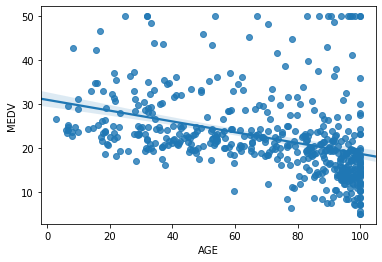

In [17]:
sns.regplot(x="AGE", y="MEDV", data=df)
plt.show()

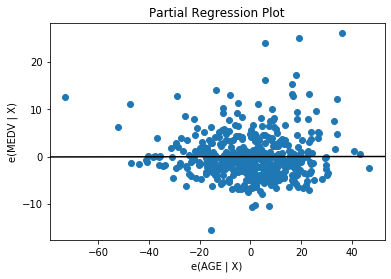

In [19]:
others = list(set(df.columns).difference(set(["MEDV", "AGE"])))
p, resids = sm.graphics.plot_partregress(
    "MEDV", "AGE", others, data=df, obs_labels=False, ret_coords=True
)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


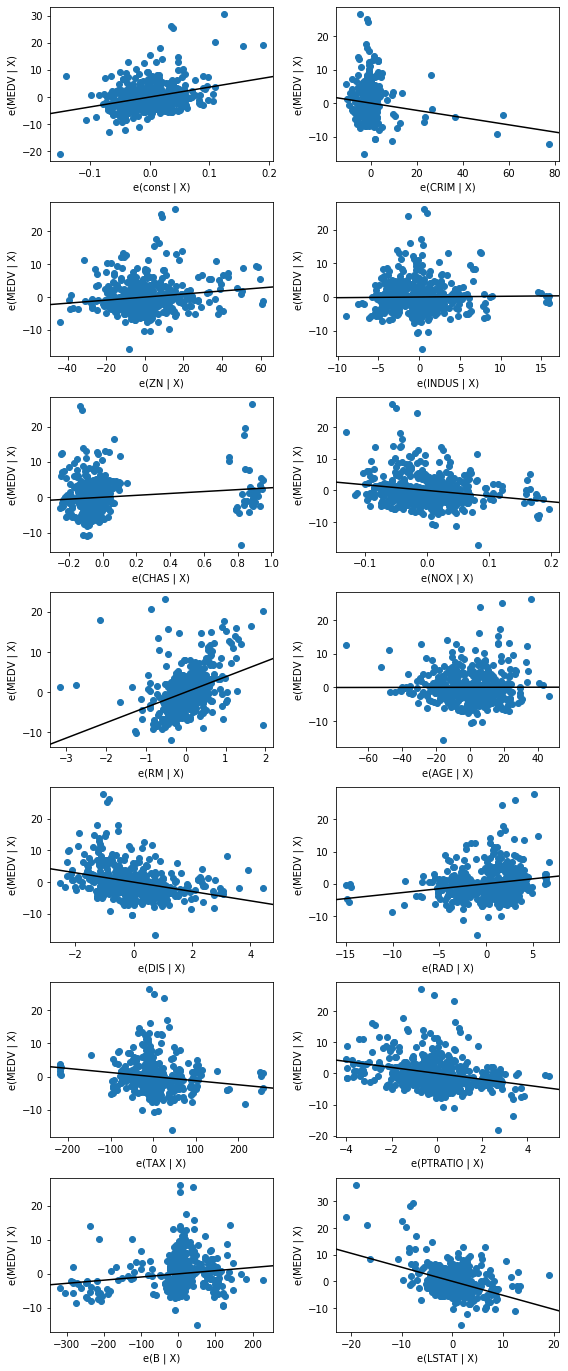

In [20]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

## CCPR 플롯

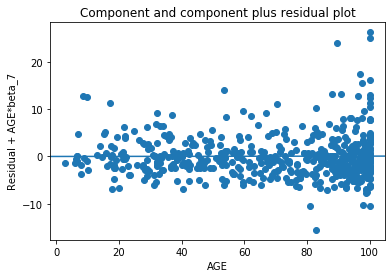

In [21]:
sm.graphics.plot_ccpr(result_boston, "AGE")
plt.show()

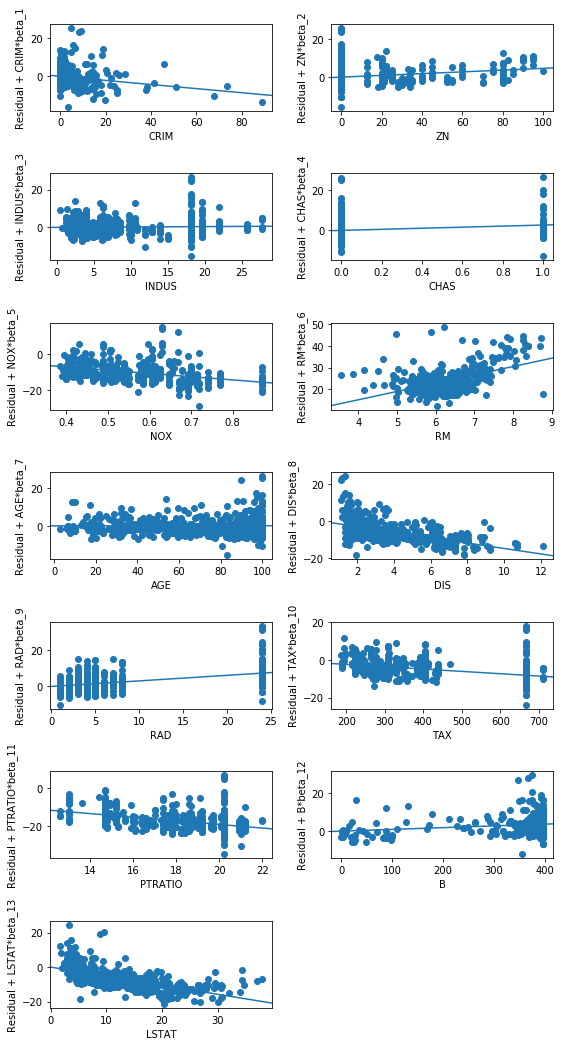

In [22]:
fig = plt.figure(figsize=(8, 15))
sm.graphics.plot_ccpr_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

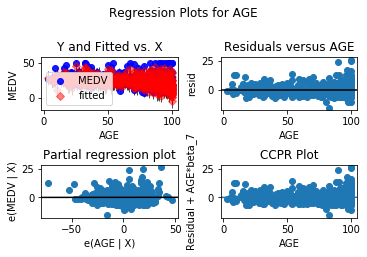

In [23]:
fig = sm.graphics.plot_regress_exog(result_boston, "AGE")
plt.tight_layout(pad=4, h_pad=0.5, w_pad=0.5)
plt.show()

## 부트스트래핑

In [27]:
from sklearn.datasets import make_regression

In [28]:
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20,
                              coef=True, random_state=0)
coef

array(42.38550486)

In [29]:
dfX0 = pd.DataFrame(X0, columns=["X1"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["y"])

model = sm.OLS(dfy, dfX)
result = model.fit()

In [30]:
result.params

const    -1.628364
X1       42.853356
dtype: float64

In [31]:
%%time
N = 1000
params_w0 = np.zeros(N)
params_w1 = np.zeros(N)
for i in range(N):
    idx = np.random.choice(len(dfy), len(dfy), replace=True)
    dfX2 = dfX.iloc[idx, :]
    dfy2 = dfy.iloc[idx]
    r = sm.OLS(dfy2, dfX2).fit()
    params_w0[i] = r.params.const
    params_w1[i] = r.params.X1

Wall time: 797 ms


SyntaxError: invalid syntax (<ipython-input-41-d9a0276360e9>, line 1)

In [54]:
import matplotlib.font_manager as fm
from matplotlib import rc, font_manager
# 디렉토리 및 파일 이름에 맞추어 변경


font_location = 'C:/Windows/Fonts/Hancom Gothic Regular.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

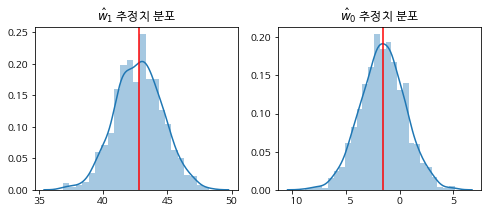

In [55]:
plt.figure(figsize=(8, 3))

ax1 = plt.subplot(121)
sns.distplot(params_w1, ax=ax1)
plt.axvline(params_w1.mean(), c='r')
plt.title("$\hat{w}_1$ 추정치 분포")

ax2 = plt.subplot(122)
sns.distplot(params_w0, ax=ax2)
plt.axvline(params_w0.mean(), c='r')
plt.title("$\hat{w}_0$ 추정치 분포")
plt.show()

In [56]:
params_w1.mean(), params_w1.std()

(42.77351103922523, 1.8537054782671707)

In [57]:
params_w0.mean(), params_w0.std()

(-1.5498522800345458, 2.0829608168606133)

In [58]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Fri, 27 May 2022   Prob (F-statistic):           2.21e-36
Time:                        00:07:11   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

## 잔차의 분포

In [60]:
import scipy as sp

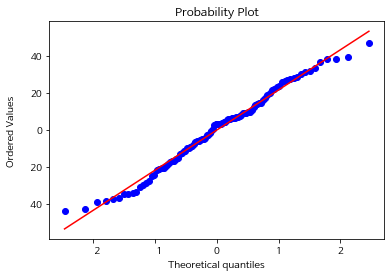

In [61]:
sp.stats.probplot(result.resid, plot=plt)
plt.show()

In [62]:
test = sm.stats.omni_normtest(result.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  3.523
P-value     :  0.172


In [63]:
test = sm.stats.jarque_bera(result.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test):
    print("%-12s: %6.3f" % xi)

Jarque-Bera :  2.059
P-value     :  0.357
Skew        : -0.073
Kurtosis    :  2.312


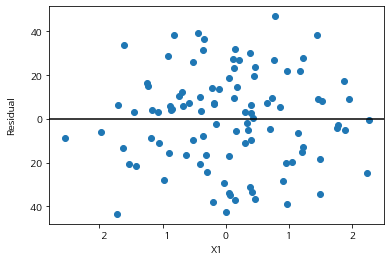

In [64]:
plt.plot(X0, result.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("X1")
plt.ylabel("Residual")
plt.show()

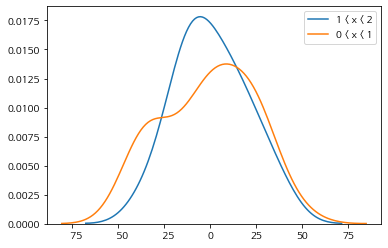

In [65]:
sns.kdeplot(result.resid[((1 < X0) & (X0 < 2)).flatten()], label="1 < x < 2")
sns.kdeplot(result.resid[((0 < X0) & (X0 < 1)).flatten()], label="0 < x < 1")
plt.legend()
plt.show()

In [66]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Fri, 27 May 2022   Prob (F-statistic):           2.21e-36
Time:                        00:26:20   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

In [67]:
print(result.t_test("X1 = 40"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            42.8534      2.142      1.332      0.186      38.603      47.104


In [68]:
import datetime
from calendar import isleap

df_nottem = sm.datasets.get_rdataset("nottem").data 

def convert_partial_year(number):
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

df_nottem["date0"] = df_nottem[["time"]].applymap(convert_partial_year)
df_nottem["date"] = pd.DatetimeIndex(df_nottem["date0"]).round('60min') + datetime.timedelta(seconds=3600*24)
df_nottem["month"] = df_nottem["date"].dt.strftime("%m").astype('category')
del df_nottem["date0"], df_nottem["date"]

model_nottem = sm.OLS.from_formula("value ~ C(month) + 0", df_nottem)
result_nottem = model_nottem.fit()
print(result_nottem.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Fri, 27 May 2022   Prob (F-statistic):          2.96e-125
Time:                        00:28:23   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

In [69]:
print(result_nottem.t_test("C(month)[01] = C(month)[02]"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.5050      0.732      0.690      0.491      -0.937       1.947


In [70]:
print(result_nottem.t_test("C(month)[03] = C(month)[02]"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             3.0050      0.732      4.105      0.000       1.563       4.447


# 추천 시스템
## 평점 데이터

In [113]:
import surprise
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = surprise.Dataset.load_builtin('ml-100k')

In [6]:
df = pd.DataFrame(data.raw_ratings, columns=["user", "item", "rate", "id"])
del df["id"]
df.head(10)

,user,item,rate
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0
5,298,474,4.0
6,115,265,2.0
7,253,465,5.0
8,305,451,3.0
9,6,86,3.0


In [7]:
df_table = df.set_index(["user", "item"]).unstack()
df_table.shape

(943, 1682)

In [8]:
df_table.iloc[212:222, 808:817].fillna("")

rate                                        
item  211  212  213  214  215  216  217  218  219
user                                             
290   3.0                      4.0       2.0     
291        4.0       4.0  4.0            4.0  4.0
292                  3.0                         
293   4.0       3.0       4.0  4.0  3.0  2.0     
294                                              
295             5.0       5.0  5.0  4.0  5.0     
296   4.0                                        
297   4.0       3.0       2.0  4.0       3.0     
298   5.0       3.0       5.0                    
299   4.0  4.0  5.0            5.0

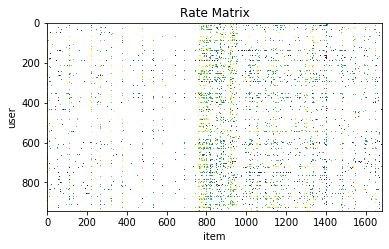

In [12]:
plt.imshow(df_table)
plt.grid(False)
plt.xlabel("item")
plt.ylabel("user")
plt.title("Rate Matrix")
plt.show()

## 추천성능 평가기준

In [16]:
from surprise.model_selection import KFold

bsl_options = {
    'method': 'als',
    'n_epochs': 5,
    'reg_u': 12,
    'reg_i': 5
}
algo = surprise.BaselineOnly(bsl_options)

np.random.seed(0)
acc = np.zeros(3)
cv = KFold(3)
for i, (trainset, testset) in enumerate(cv.split(data)):
    algo.fit(trainset)
    predictions = algo.test(testset)
    acc[i] = surprise.accuracy.rmse(predictions, verbose=True)
acc.mean()

Estimating biases using als...
RMSE: 0.9453
Estimating biases using als...
RMSE: 0.9377
Estimating biases using als...
RMSE: 0.9500


0.9443304984013942

In [17]:
from surprise.model_selection import cross_validate

cross_validate(algo, data)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([0.9384446 , 0.94651657, 0.93612815, 0.94221861, 0.94428787]),
 'test_mae': array([0.74477853, 0.75124267, 0.73975393, 0.745764  , 0.74659098]),
 'fit_time': (0.0578455924987793,
  0.07132506370544434,
  0.08461761474609375,
  0.06653594970703125,
  0.08277773857116699),
 'test_time': (0.09674215316772461,
  0.05186200141906738,
  0.09380197525024414,
  0.05285811424255371,
  0.1006317138671875)}

## 평균제곱차이 유사도

In [18]:
sim_options = {'name': 'msd'}
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


0.7726801901092284

## 코사인 유사도

In [19]:
sim_options = {'name': 'cosine'}
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


0.8046567723959086

## 피어슨 유사도

In [21]:
sim_options = {'name': 'pearson'}
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


0.8032778978216127

## 피어슨-베이스라인 유사도

In [22]:
sim_options = {'name': 'pearson_baseline'}
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


0.791677323191221

## KNN 가중치 예측 방법

In [23]:
sim_options = {'name': 'pearson_baseline'}
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


0.7911738451689001

In [24]:
sim_options = {'name': 'pearson_baseline'}
algo = surprise.KNNWithMeans(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


0.7298887762484759

In [25]:
sim_options = {'name': 'pearson_baseline'}
algo = surprise.KNNBaseline(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


0.7211484159690038

## SVD (Singular Value Decomposition)

In [26]:
%%time
algo = surprise.SVD(n_factors=100)
cross_validate(algo, data)["test_mae"].mean()

Wall time: 17.8 s


0.7365684847263315

## NMF(Non-negative matrix factorization)

In [27]:
%%time
algo = surprise.NMF(n_factors=100)
cross_validate(algo, data)["test_mae"].mean()

Wall time: 56.3 s


0.838535743496668

# 분류용 예제 데이터
## 붓꽃 데이터

In [153]:
from sklearn.datasets import load_iris

In [154]:
iris = load_iris()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\base.py:241: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\base.py:245: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

In [155]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


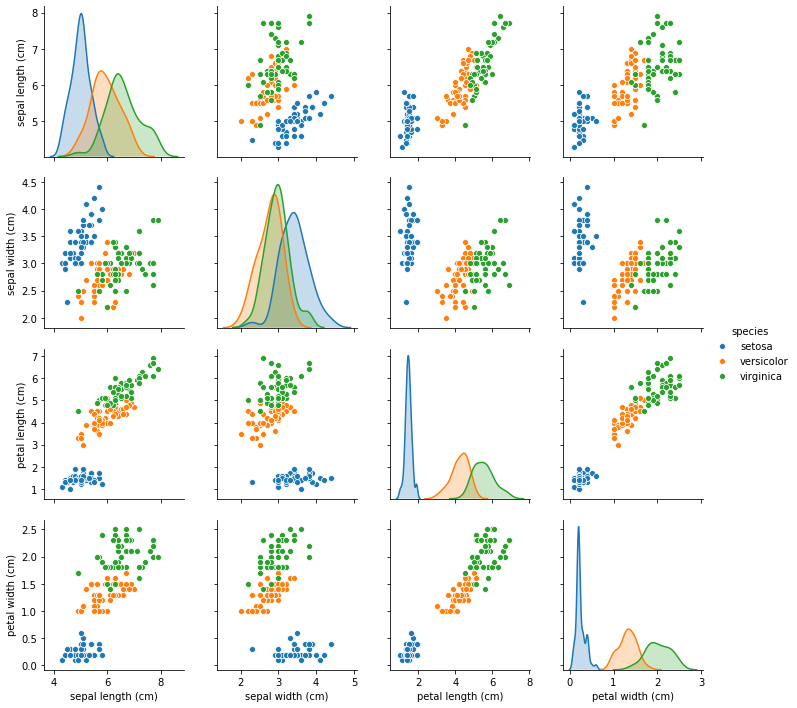

In [156]:
sns.pairplot(df, hue="species")
plt.show()

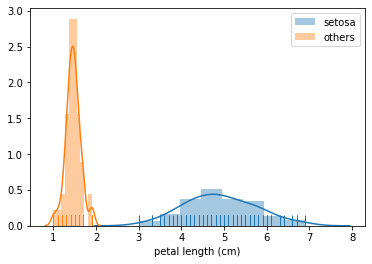

In [157]:
sns.distplot(df[df.species != "setosa"]["petal length (cm)"], hist=True, rug=True, label="setosa")
sns.distplot(df[df.species == "setosa"]["petal length (cm)"], hist=True, rug=True, label="others")
plt.legend()
plt.show()

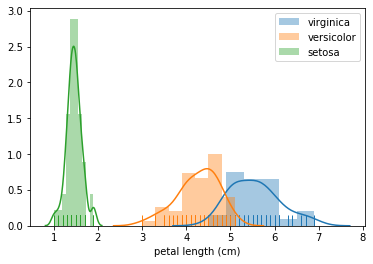

In [158]:
sns.distplot(df[df.species == "virginica"]["petal length (cm)"], hist=True, rug=True, label="virginica")
sns.distplot(df[df.species == "versicolor"]["petal length (cm)"], hist=True, rug=True, label="versicolor")
sns.distplot(df[df.species == "setosa"]["petal length (cm)"], hist=True, rug=True, label="setosa")
plt.legend()
plt.show()

In [159]:
print(df[df.species == 'setosa']["petal length (cm)"].mean())
print(df[df.species == 'versicolor']["petal length (cm)"].min())
print(df[df.species == 'virginica']["petal length (cm)"].min())
print(df.mean())

1.4620000000000002
3.0
4.5
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


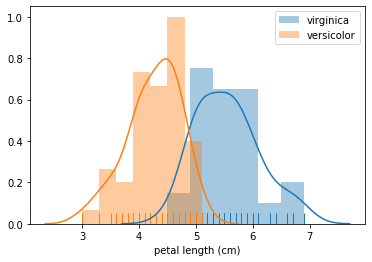

In [160]:
sns.distplot(df[df.species == "virginica"]["petal length (cm)"], hist=True, rug=True, label="virginica")
sns.distplot(df[df.species == "versicolor"]["petal length (cm)"], hist=True, rug=True, label="versicolor")
plt.legend()
plt.show()

In [162]:
from sklearn.preprocessing import StandardScaler

In [163]:
ss = StandardScaler()

In [164]:
ss.fit_transform(df.iloc[:,:-1])[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [166]:
from sklearn.model_selection import train_test_split

In [176]:
df.drop(['sepal length (cm)','sepal width (cm)', 'petal width (cm)'], axis=1, inplace=True)

In [180]:
X_train, X_test, y_train, y_test = train_test_split(
                                    df.iloc[:,:-1], # 문제,
                                    df.iloc[:,-1], # 정답,
                                    test_size=0.2, # 테스트 비율,
                                    random_state=42 # 랜덤 시드값
)

In [181]:
X_train_s = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
X_train_s[:5]

,petal length (cm)
0,-1.562535
1,-1.276006
2,0.385858
3,-1.218701
4,-1.390618


In [185]:
X_test_s = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)
X_test_s[:5]

,petal length (cm)
0,0.557775
1,-1.161395
2,1.818500
3,0.443164
4,0.615081


In [182]:
from sklearn.preprocessing import MinMaxScaler

In [183]:
ms = MinMaxScaler()

In [184]:
X_train_m = pd.DataFrame(ms.fit_transform(X_train), columns=X_train.columns)
X_train_m[:5]

,petal length (cm)
0,0.000000
1,0.087719
2,0.596491
3,0.105263
4,0.052632


In [186]:
X_test_m = pd.DataFrame(ms.transform(X_test), columns=X_test.columns)
X_test_m[:5]

,petal length (cm)
0,0.649123
1,0.122807
2,1.035088
3,0.614035
4,0.666667


In [187]:
ms_df_values = ms.fit_transform(df.iloc[:,:-1])
ms_df_values[:5]

array([[0.06779661],
       [0.06779661],
       [0.05084746],
       [0.08474576],
       [0.06779661]])

In [190]:
ms_df = pd.DataFrame(data=ms_df_values, columns=X_test.columns)
ms_df.head(3)

,petal length (cm)
0,0.067797
1,0.067797
2,0.050847


In [191]:
ms_df['species'] = iris.target
ms_df['species'] = ms_df['species'].astype('category')
ms_df['species'] = ms_df['species'].cat.rename_categories(iris.target_names)
ms_df['species'][:3]

0    setosa
1    setosa
2    setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [198]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# cross_val_score : 다양한 샘플링을 해서 여러번 테스트 --> 평균치를 구해본다.
from sklearn.metrics import *

In [199]:
knn = KNeighborsClassifier()

In [201]:
knn.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [202]:
scores = cross_val_score(knn, X_train, y_train, cv=10) # cv = fold값!
print(scores)

[0.92307692 0.91666667 0.91666667 1.         0.91666667 0.75
 1.         1.         0.91666667 0.90909091]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review

In [203]:
type(scores)

numpy.ndarray

In [204]:
np.mean(scores)

0.9248834498834497

In [205]:
def print_metrics(model, x, y, k):
    scores = cross_val_score(model, x, y, cv=k) #cv = fold값
    print('----------교차검증 결과------------ :\n {}'.format(list(scores)))
    acc_mean = np.mean(scores)
    print('----------교차검증 평균---------- \n {:.2f}'.format(acc_mean))
#     pred = knn.predict(X_test)
#     acc = accuracy_score(y_test,pred)
#     print(acc)
    return scores, acc_mean

----------교차검증 결과------------ :
 [0.96, 0.9583333333333334, 0.8333333333333334, 1.0, 0.9130434782608695]
----------교차검증 평균---------- 
 0.93


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review

(array([1., 0., 0., 0., 1., 1., 0., 2., 0., 1.]),
 array([0.83333333, 0.85      , 0.86666667, 0.88333333, 0.9       ,
        0.91666667, 0.93333333, 0.95      , 0.96666667, 0.98333333,
        1.        ]),
 <a list of 10 Patch objects>)

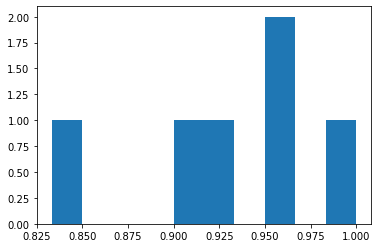

In [207]:
sc2, am2 = print_metrics(knn, X_train, y_train, 5)
list_sc2 = list(sc2)
list_sc2.append(am2) # 교차검증 평균도 함께 그리기
plt.hist(list_sc2)

In [208]:
pred = knn.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

1.0

In [209]:
y_train.dtypes

CategoricalDtype(categories=['setosa', 'versicolor', 'virginica'], ordered=False)

In [210]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
                                                    ms_df.iloc[:, :-1], #문제,
                                                    ms_df.iloc[:, -1], #정답,
                                                    test_size=0.2, #테스트 비율,
                                                    random_state=42#랜덤 시드값
)

In [211]:
knn.fit(X_train_m, y_train_m)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

----------교차검증 결과------------ :
 [0.96, 0.9583333333333334, 0.8333333333333334, 1.0, 0.9130434782608695]
----------교차검증 평균---------- 
 0.93


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review

(array([1., 0., 0., 0., 1., 0., 0., 2., 0., 1.]),
 array([0.83333333, 0.85      , 0.86666667, 0.88333333, 0.9       ,
        0.91666667, 0.93333333, 0.95      , 0.96666667, 0.98333333,
        1.        ]),
 <a list of 10 Patch objects>)

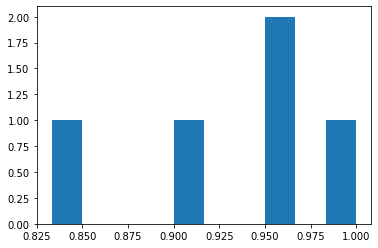

In [212]:
sc3, am3 = print_metrics(knn, X_train_m, y_train_m, 5)
plt.hist(sc3)

In [213]:
grid_params = {
    'n_neighbors' : list(range(1,20)), # 19개
    'weights' : ['uniform', 'distance'], # 2개
    'metric' : ['euclidean', 'manhattan', 'minkowski'] # 3개
} # 19 * 2 * 3
# fold = 5, 19 * 2 * 3 * 5

In [215]:
from sklearn.model_selection import GridSearchCV

In [216]:
gs_model = GridSearchCV(knn, grid_params, cv=5)
gs_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [59]:
plength = iris.data[:, 2]

In [65]:
target = iris.target

In [66]:
target_names = iris.target_names

In [67]:
labels = target_names[target]

In [68]:
is_setosa = (labels == 'setosa')

In [69]:
max_setosa =plength[is_setosa].max()
min_non_setosa = plength[~is_setosa].min()
print('Maximum of setosa: {0}.'.format(max_setosa))     # 1.9
print('Minimum of others: {0}.'.format(min_non_setosa))     # 3.0

Maximum of setosa: 1.9.
Minimum of others: 3.0.


In [72]:
features = iris.data[~is_setosa]
labels = labels[~is_setosa]

In [73]:
is_virginica = (labels == 'virginica')

In [74]:
best_acc = 0.0     # 일단 0%로 설정해놓습니다.

In [89]:
# feature에는 0, 1, 2, 3이 담깁니다.
for feature in range(features.shape[1]):
    # feature는 각각 septal length, septal width, petal length, petal width를 나타냅니다.
    threshold = features[:,feature]
    for t in threshold:
        # 경계값 t와 비교하기 위해 실제값을 가져옵시다.
        # 사실 경계값 t는 실제값 중 하나로 지정됩니다.
        feature_i = features[:, feature]
        # t보다 큰 feature_i를 모두 True라고 지정합니다.
        # 다시 말해 모두 Virginica라고 예상을 합니다.
        pred = (feature_i > t)
        # Virginica라고 예상한 것이 얼마나 실제(is_virginica)와 맞는지 비교합니다.
        # 맞으면 1, 틀리면 0으로 나올테니 평균(mean)을 내줍니다.
        acc = (pred == is_virginica).mean()
        # 오히려 반대의 경우가 정확도가 더 높을 수도 있습니다.
        rev_acc = (pred == ~is_virginica).mean()
        # 그럴 경우 두 값을 바꿔줍니다.
        if rev_acc > acc:
            reverse = True
            acc = rev_acc
        else:
            reverse = False
        # 만약 새로운 acc가 여태까지의 best_acc보다 높았다면 새로운 acc가 best_acc가 됩니다.
        if acc > best_acc:
            best_acc = acc
#             best_fi = fi
            best_t = t
            best_reverse = reverse


print(best_t, best_reverse, best_acc)

1.6 False 0.94


In [88]:
features[:, feature]

array([1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. ,
       1.4, 1.3, 1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4,
       1.4, 1.7, 1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3,
       1.3, 1.2, 1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9,
       2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4,
       2.3, 1.8, 2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8,
       2.1, 1.6, 1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4,
       2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [81]:
threshold

array([7. , 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. ,
       6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6,
       6.8, 6.7, 6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6,
       5.5, 5.5, 6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8,
       7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8,
       6.4, 6.5, 7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1,
       6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7,
       6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [95]:
features

array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [6.6, 2.9, 4.6, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5. , 2. , 3.5, 1. ],
       [5.9, 3. , 4.2, 1.5],
       [6. , 2.2, 4. , 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.7, 3.1, 4.4, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [5.8, 2.7, 4.1, 1. ],
       [6.2, 2.2, 4.5, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.9, 3.2, 4.8, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.9, 4.5, 1.5],
       [5.7, 2.6, 3.5, 1. ],
       [5.5, 2.4, 3.8, 1.1],
       [5.5, 2.4, 3.7, 1. ],
       [5.8, 2.7, 3.9, 1.2],
       [6. , 2.7, 5.1, 1.6],
       [5.4, 3

## 와인데이터

In [96]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\base.py:241: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\base.py:245: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

In [97]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
sy = pd.Series(wine.target, dtype="category")
sy = sy.cat.rename_categories(wine.target_names)
df['class'] = sy
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,class_2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,class_2


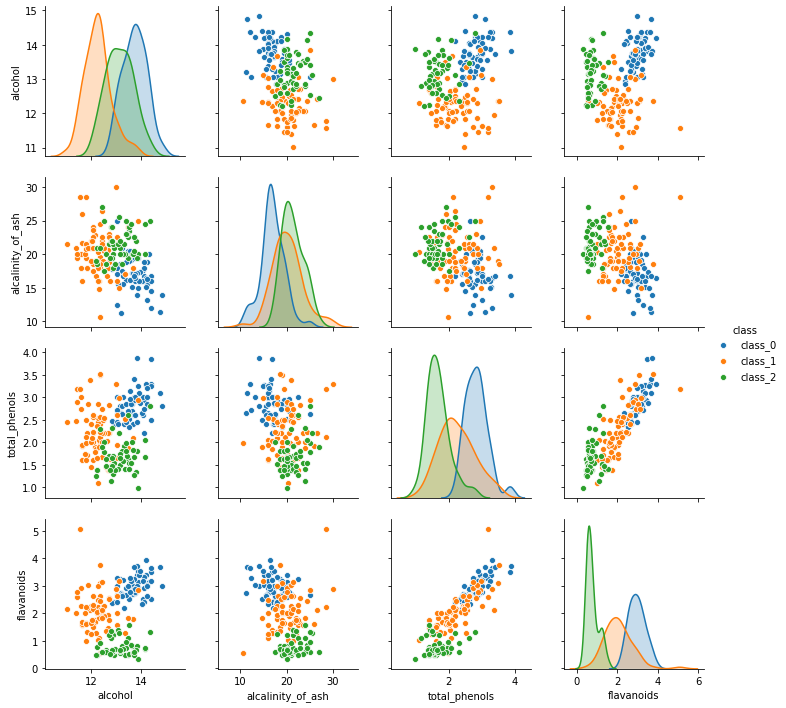

In [98]:
sns.pairplot(vars=["alcohol", "alcalinity_of_ash", "total_phenols", "flavanoids"], 
             hue="class", data=df)
plt.show()

## 유방암 진단 데이터

In [104]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\base.py:241: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\base.py:245: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

In [102]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
sy = pd.Series(cancer.target, dtype="category")
sy = sy.cat.rename_categories(cancer.target_names)
df['class'] = sy
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,benign


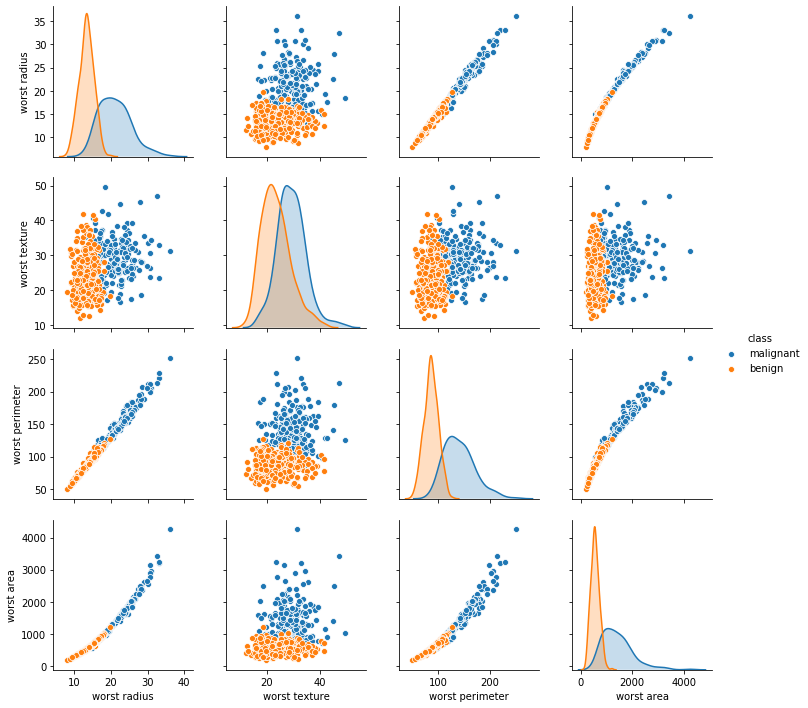

In [107]:
sns.pairplot(vars=["worst radius", "worst texture", "worst perimeter", "worst area"], 
             hue="class", data=df)
plt.show()

## 대표 수종 데이터

In [114]:
from sklearn.datasets import fetch_covtype
covtype = fetch_covtype()

In [115]:
df = pd.DataFrame(covtype.data, 
                  columns=["x{:02d}".format(i + 1) for i in range(covtype.data.shape[1])],
                  dtype=int)
sy = pd.Series(covtype.target, dtype="category")
df['covtype'] = sy
df.tail()

,x01,x02,x03,x04,x05,x06,x07,x08,x09,x10,...,x46,x47,x48,x49,x50,x51,x52,x53,x54,covtype
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,0,0,3


In [116]:
pd.DataFrame(df.nunique()).T

,x01,x02,x03,x04,x05,x06,x07,x08,x09,x10,...,x46,x47,x48,x49,x50,x51,x52,x53,x54,covtype
0,1978,361,67,551,700,5785,207,185,255,5827,...,2,2,2,2,2,2,2,2,2,7


In [117]:
df.iloc[:, 10:54] = df.iloc[:, 10:54].astype('category')

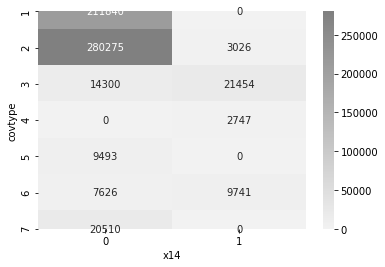

In [119]:
df_count = df.pivot_table(index="covtype", columns="x14", aggfunc="size")
sns.heatmap(df_count, cmap=sns.light_palette("gray", as_cmap=True), annot=True, fmt="0")
plt.show()

In [121]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all')

In [122]:
from pprint import pprint
pprint(list(newsgroups.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [123]:
print(newsgroups.data[1])
print("=" * 80)
print(newsgroups.target_names[newsgroups.target[1]])

From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)
Subject: Which high-performance VLB video card?
Summary: Seek recommendations for VLB video card
Nntp-Posting-Host: midway.ecn.uoknor.edu
Organization: Engineering Computer Network, University of Oklahoma, Norman, OK, USA
Keywords: orchid, stealth, vlb
Lines: 21

  My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  Thank you!

  - Matt

-- 
    |  Matthew B. Lawson <------------> (mblawson@essex.ecn.uoknor.edu)  |   
  --+-- "Now I, Nebuchadnezzar, praise and exalt and glorify the King  --+-- 
    |   of heaven, because everything he does is right and all his ways  |   
    |   are just." - Nebuchadnezzar, king of Babylon, 562 B.C.           |   

comp.sys.ibm.pc.hardware


## 숫자 필기 이미지 데이터

In [124]:
from sklearn.datasets import load_digits
digits = load_digits()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\base.py:549: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = data[:, -1].astype(np.int, copy=False)


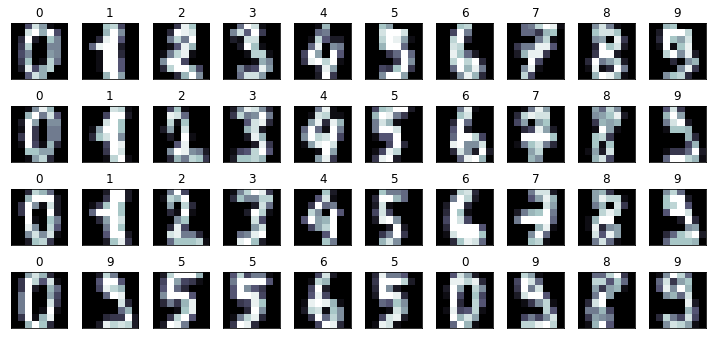

In [125]:
np.random.seed(0)
N = 4
M = 10
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone, interpolation="none")
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[digits.target[k]])
plt.tight_layout()
plt.show()

## 올리베티 얼굴 사진 데이터

In [147]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Song\scikit_learn_data


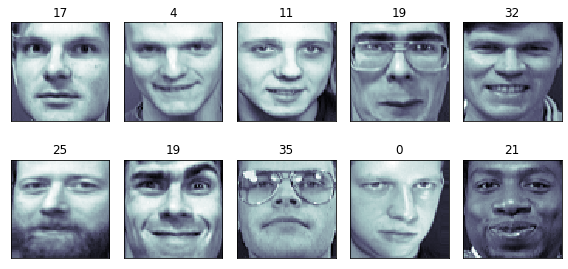

In [148]:
np.random.seed(0)
N = 2
M = 5
fig = plt.figure(figsize=(8, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(olivetti.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i*M+j]
        ax = fig.add_subplot(N, M, i*M+j+1)
        ax.imshow(olivetti.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(olivetti.target[k])
plt.tight_layout()
plt.show()

## Labeled Faces in the Wild (LFW) 데이터

In [149]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

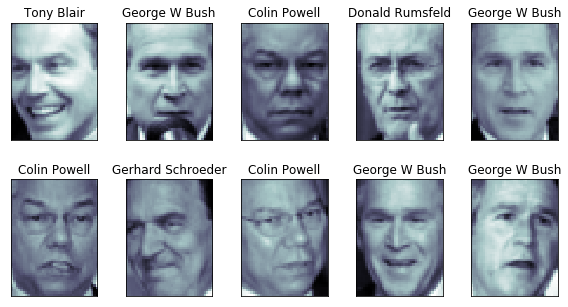

In [150]:
np.random.seed(0)
N = 2
M = 5
fig = plt.figure(figsize=(8, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0.1, wspace=0.05)
klist = np.random.choice(range(len(lfw_people.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i*M+j]
        ax = fig.add_subplot(N, M, i*M+j+1)
        ax.imshow(lfw_people.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(lfw_people.target_names[lfw_people.target[k]])
plt.tight_layout()
plt.show()

In [151]:
from sklearn.datasets import fetch_lfw_pairs
lfw_pairs = fetch_lfw_pairs(resize=0.4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:377: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.zeros(n_pairs, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-p

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\_pilutil.py:418: DeprecationWarning: tostrin

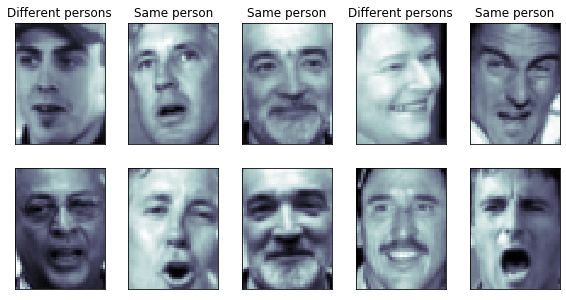

In [152]:
np.random.seed(0)
N = 2
M = 5
fig = plt.figure(figsize=(8, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0.01, wspace=0.05)
klist = np.random.choice(range(len(lfw_pairs.data)), M)
for j in range(M):
    k = klist[j]
    ax1 = fig.add_subplot(N, M, j+1)
    ax1.imshow(lfw_pairs.pairs[k][0], cmap=plt.cm.bone)
    ax1.grid(False)
    ax1.xaxis.set_ticks([])
    ax1.yaxis.set_ticks([])
    plt.title(lfw_pairs.target_names[lfw_pairs.target[k]])
    ax2 = fig.add_subplot(N, M, j+1 + M)
    ax2.imshow(lfw_pairs.pairs[k][1], cmap=plt.cm.bone)
    ax2.grid(False)
    ax2.xaxis.set_ticks([])
    ax2.yaxis.set_ticks([])
plt.tight_layout()
plt.show()

In [3]:
a = 1
def asv(a) :
    a = 0
    a = a + 1
    return a

a = asv(a)
print(a)

1
